In [1]:
#Participants
#NVDA
#NVDY: YieldMax NYDA Options Income Strategy ETF
#NVD: GraniteShares 2X Short NVDA Daily ETF


In [2]:
#Package
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [3]:
# Read excel file
file_path = r'D:\US Research\NVDA Derivatives.xlsx'
df = pd.read_excel(file_path, index_col=0, parse_dates=True)

# Calculate daily returns
df['NVDA Return'] = df['NVDA'].pct_change()
df['NVDY Return'] = df['NVDY'].pct_change()
df['NVD Return'] = df['NVD'].pct_change()

# Remove any rows with NaN values
df = df.dropna()

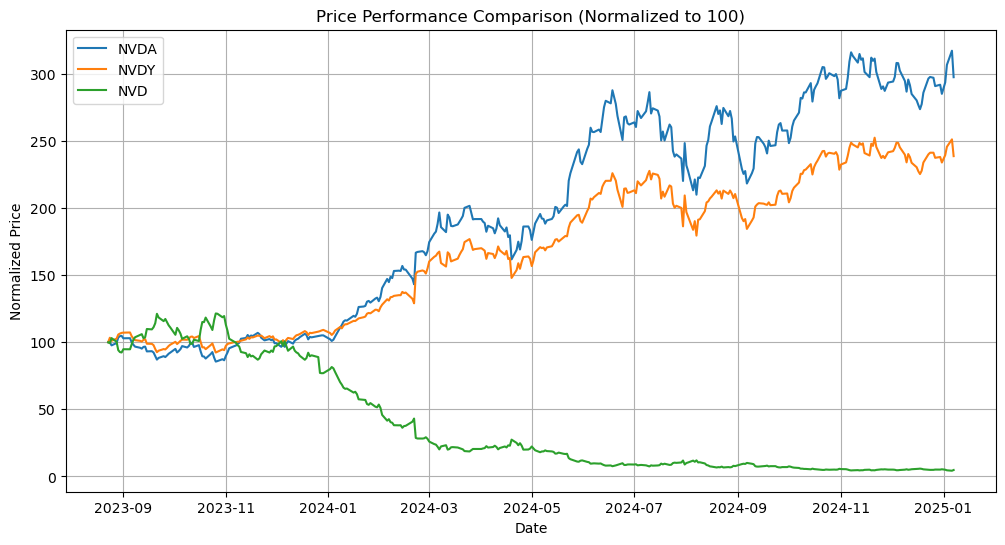

In [4]:
#Normalized plot
# Normalize prices to 100 at the start for comparison
normalized_df = df[['NVDA','NVDY','NVD']] / df[['NVDA','NVDY','NVD']].iloc[0] * 100

plt.figure(figsize=(12, 6))
plt.plot(normalized_df.index, normalized_df['NVDA'], label='NVDA')
plt.plot(normalized_df.index, normalized_df['NVDY'], label='NVDY')
plt.plot(normalized_df.index, normalized_df['NVD'], label='NVD')

plt.title('Price Performance Comparison (Normalized to 100)')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
#Regression
# Run regressions and store betas
betas = pd.Series()

# Regression for NVDY against NVDA
X_NVDY = sm.add_constant(df['NVDA Return'])
model_NVDY = sm.OLS(df['NVDY Return'], X_NVDY).fit()
betas['NVDY Return'] = model_NVDY.params['NVDA Return']

# Regression for NVD against NVDA
X_NVD = sm.add_constant(df['NVDA Return'])
model_NVD = sm.OLS(df['NVD Return'], X_NVD).fit()
betas['NVD Return'] = model_NVD.params['NVDA Return']

print("Betas relative to NVDA:")
print(betas)


Betas relative to NVDA:
NVDY Return    0.766956
NVD Return    -1.920459
dtype: float64


In [6]:
################################Arbitrage: NVDY vs NVD##########################
Input_Investment_Total = 10000  # Total investment amount for the pair

# Get betas
NVDY_beta = betas['NVDY Return']
NVD_beta = betas['NVD Return']

# Beta-neutral portfolio calculation:
# For weights w1 (NVDY) and w2 (NVD):
# 1. Beta-neutral condition: w1×β1 + w2×β2 = 0
# 2. Weights sum to 1: w1 + w2 = 1
# Solving these equations:
# w1×β1 + (1-w1)×β2 = 0
# w1×β1 + β2 - w1×β2 = 0
# w1×(β1 - β2) = -β2
# w1 = -β2/(β1 - β2)

# Calculate position weights that make the portfolio beta-neutral
NVDY_weight = (-NVD_beta) / (NVDY_beta - NVD_beta)
NVD_weight = 1 - NVDY_weight

# Calculate investment amounts
NVDY_investment = Input_Investment_Total * NVDY_weight
NVD_investment = Input_Investment_Total * NVD_weight

# Verify beta neutrality
portfolio_beta = NVDY_weight*NVDY_beta + NVD_weight*NVD_beta

# Calculate number of shares based on latest prices
NVDY_shares = NVDY_investment / df['NVDY'].iloc[-1]
NVD_shares = NVD_investment / df['NVD'].iloc[-1]

# Assuming dividend information (you'll need to replace these with actual values)
NVDY_DIV = 0.8983
NVD_DIV = 2.60797/12   # Replace with actual dividend

# Calculate monthly dividend income
NVDY_monthly_income = NVDY_shares * NVDY_DIV
NVD_monthly_income = NVD_shares * NVD_DIV

# Calculate annual dividend income
NVDY_annual_income = NVDY_monthly_income * 12
NVD_annual_income = NVD_monthly_income * 12

# Calculate total portfolio statistics
total_investment = NVDY_investment + NVD_investment
total_monthly_income = NVDY_monthly_income + NVD_monthly_income
total_annual_income = NVDY_annual_income + NVD_annual_income
portfolio_yield = (total_annual_income / total_investment) * 100

print("\nArbitrage: NVDY vs NVD")
print(f"NVDY Beta: {NVDY_beta:.4f}")
print(f"NVD Beta: {NVD_beta:.4f}")
print(f"NVDY Weight: {NVDY_weight:.4f}")
print(f"NVD Weight: {NVD_weight:.4f}")
print(f"NVDY Investment: ${NVDY_investment:.2f}")
print(f"NVD Investment: ${NVD_investment:.2f}")
print(f"Portfolio Beta: {NVDY_weight*NVDY_beta + NVD_weight*NVD_beta:.6f}")

print("\nInvestment Analysis (Beta-Neutral):")
print("NVDY Investment:")
print(f"Investment Amount: ${NVDY_investment:.2f}")
print(f"Shares Purchased: {NVDY_shares:.2f}")
print(f"Monthly Dividend Income: ${NVDY_monthly_income:.2f}")
print(f"Annual Dividend Income: ${NVDY_annual_income:.2f}")

print("\nNVD Investment:")
print(f"Investment Amount: ${NVD_investment:.2f}")
print(f"Shares Purchased: {NVD_shares:.2f}")
print(f"Monthly Dividend Income: ${NVD_monthly_income:.2f}")
print(f"Annual Dividend Income: ${NVD_annual_income:.2f}")

print("\nTotal Portfolio:")
print(f"Total Investment: ${total_investment:.2f}")
print(f"Total Monthly Income: ${total_monthly_income:.2f}")
print(f"Total Annual Income: ${total_annual_income:.2f}")
print(f"Portfolio Yield: {portfolio_yield:.2f}%")


Arbitrage: NVDY vs NVD
NVDY Beta: 0.7670
NVD Beta: -1.9205
NVDY Weight: 0.7146
NVD Weight: 0.2854
NVDY Investment: $7146.12
NVD Investment: $2853.88
Portfolio Beta: 0.000000

Investment Analysis (Beta-Neutral):
NVDY Investment:
Investment Amount: $7146.12
Shares Purchased: 311.65
Monthly Dividend Income: $279.95
Annual Dividend Income: $3359.46

NVD Investment:
Investment Amount: $2853.88
Shares Purchased: 105.82
Monthly Dividend Income: $23.00
Annual Dividend Income: $275.97

Total Portfolio:
Total Investment: $10000.00
Total Monthly Income: $302.95
Total Annual Income: $3635.42
Portfolio Yield: 36.35%
